In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [38]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [39]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [40]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [41]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [42]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

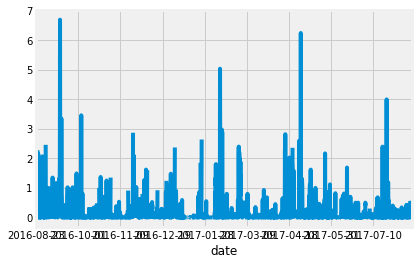

In [146]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurement.date, Measurement.prcp).all()

last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").all()
    
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame(last_year, columns=["date", "prcp"])
#last_year_df.set_index(last_year_df["date"], inplace=True)
last_year_df

# Sort the dataframe by date
sorted_last_year = last_year_df.sort_values(by=["date"]).set_index("date")
sorted_last_year
# Use Pandas Plotting with Matplotlib to plot the data

sorted_last_year.plot()
#set index values for dates!


![precipitation](Images/precipitation.png)

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [50]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()


9

In [57]:
total_stations = session.query(Measurement.station, Measurement.tobs).all()
total_stations_df = pd.DataFrame(total_stations, columns=["station", "tobs"])
total_stations_df

,station,tobs
0,USC00519397,65.0
1,USC00519397,63.0
2,USC00519397,74.0
3,USC00519397,76.0
4,USC00519397,73.0
5,USC00519397,70.0
6,USC00519397,64.0
7,USC00519397,68.0
8,USC00519397,73.0
9,USC00519397,64.0


In [75]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_count = session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).all()

#unique_station_count = {station: count for station, count in station_count}
station_count
# List the stations and the counts in descending order.
station_count_df = pd.DataFrame(station_count)
station_count_sort = station_count_df.sort_values(by=["count"], ascending=False)
station_count_sort

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [114]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

#station_temp_count = session.query(Measurement.station, Measurement.tobs, func.count(Measurement.station).label("count")).group_by(Measurement.tobs).count()
station_temp = session.query(Measurement.station, Measurement.tobs).group_by(Measurement.station,Measurement.tobs).all()

station_temp_df = pd.DataFrame(station_temp)
station_temp_sort = station_temp_df.sort_values(by=["station"], ascending=False)
#print(station_temp_sort)

#lowest temperature recorded 
station_temp_df.loc[station_temp_sort["tobs"] == 53.0]
station_temp_df["tobs"].min()

#Highest temperature recorded
station_temp_df.loc[station_temp_sort["tobs"] == 87.0]
station_temp_df["tobs"].max()

#average temperature most active station
most_active_station= station_temp_df[(station_temp_df["station"]== "USC00519281")]
most_active_station["tobs"].mean()



87.0

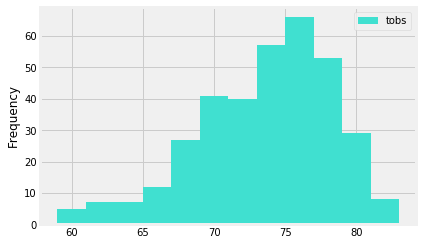

In [132]:
# Choose the station with the highest number of temperature observations.
date_temp_station = session.query(Measurement.station, Measurement.date, Measurement.tobs).all()

last_year_station = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").all()
last_year_station_df = pd.DataFrame(last_year_station)
most_active_last_year_station = last_year_station_df[(last_year_station_df["station"]== "USC00519281")]
most_active_last_year_station
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_last_year_station.plot.hist(grid=True, bins=12, rwidth=1,
                   color='turquoise')


![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [23]:
# Plot the daily normals as an area plot with `stacked=False`
